(optim:tutorial:bridge)=
# Optimizing a bridge structure 


## Installation of the *truss* package

For this session, you will need the Python [truss](https://github.com/lcharleux/truss) package. The following cell will install it automatically.

In [1]:
# FOR JUPYTER LAB
%matplotlib notebook
# FOR JUPYTER NOTEBOOK AND HUB
# % matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import zipfile
import urllib.request
import shutil
from scipy import optimize


url = "https://github.com/lcharleux/truss/archive/master.zip"
file_name = "truss-master.zip"

with urllib.request.urlopen(url) as response, open(file_name, "wb") as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

os.remove(file_name)

sys.path.append("truss-master")
try:
    import truss

    print("Truss is correctly installed")
except:
    print("Truss is NOT correctly installed !")

Truss is correctly installed


A short truss tutorial is available here:

http://truss.readthedocs.io/en/latest/tutorial.html

## Building the bridge structure

In this session, we will modelled a bridge structure using truss and optimize it using various criteria. The basic structure is introduced below. It is made of steel bars and loaded with one vertical force on $G$. The bridge is symmetrical so only the left half is modelled.

<IPython.core.display.Javascript object>


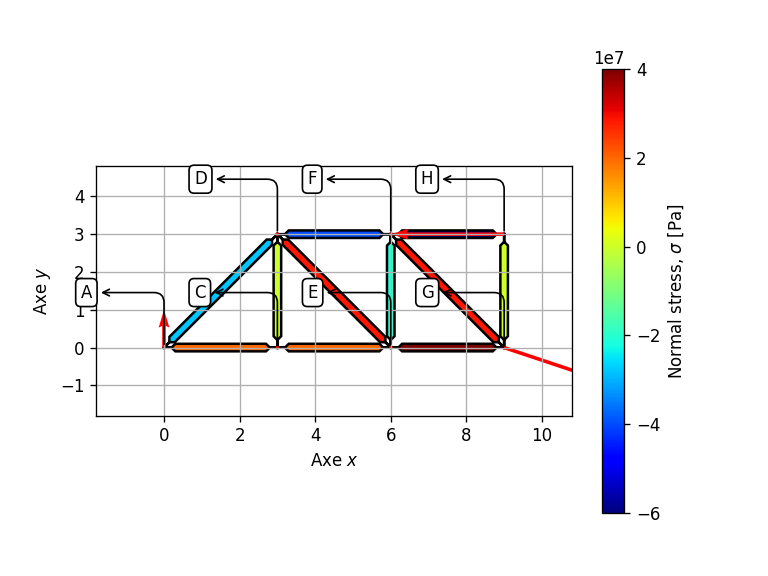

Text(0, 0.5, 'Axe $y$')

In [61]:
E = 210.0e9  # Young Modulus [Pa]
rho = 7800.0  # Density       [kg/m**3]
A = 5.0e-2  # Cross section [m**2]
sigmay = 400.0e6  # Yield Stress  [Pa]

# Model definition
model = truss.core.Model()  # Model definition

# NODES
nA = model.add_node((0.0, 0.0), label="A")
nC = model.add_node((3.0, 0.0), label="C")
nD = model.add_node((3.0, 3.0), label="D")
nE = model.add_node((6.0, 0.0), label="E")
nF = model.add_node((6.0, 3.0), label="F")
nG = model.add_node((9.0, 0.0), label="G")
nH = model.add_node((9.0, 3.0), label="H")

# BOUNDARY CONDITIONS
nA.block[1] = True
nG.block[0] = True
nH.block[0] = True

# BARS
AC = model.add_bar(nA, nC, modulus=E, density=rho, section=A, yield_stress=sigmay)
CD = model.add_bar(nC, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
AD = model.add_bar(nA, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
CE = model.add_bar(nC, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
DF = model.add_bar(nD, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
DE = model.add_bar(nD, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
EF = model.add_bar(nE, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
EG = model.add_bar(nE, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
FH = model.add_bar(nF, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)
FG = model.add_bar(nF, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
GH = model.add_bar(nG, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)

# STRUCTURAL LOADING
nG.force = np.array([0.0, -1.0e6])


model.solve()


xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

### Detailed results at the nodes

In [41]:
model.data(at="nodes")

label coords           disp                force             block       
      o      x    y        ux        uy         Fx         Fy     bx     by
0     A    0.0  0.0 -0.001143  0.000000        0.0  1000000.0  False   True
1     C    3.0  0.0 -0.000857 -0.003380        0.0        0.0  False  False
2     D    3.0  3.0  0.001429 -0.003380        0.0        0.0  False  False
3     E    6.0  0.0 -0.000571 -0.006188        0.0        0.0  False  False
4     F    6.0  3.0  0.000857 -0.006473        0.0        0.0  False  False
5     G    9.0  0.0  0.000000 -0.008139  3000000.0 -1000000.0   True  False
6     H    9.0  3.0  0.000000 -0.008139 -3000000.0        0.0   True  False

### Detailed results on the bars

In [42]:
model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C    0.05  7800.0  1000000.000000   0.000286  0.000095   
1     C  D    0.05  7800.0        0.000000   0.000000  0.000000   
2     A  D    0.05  7800.0 -1414213.562373  -0.000571 -0.000135   
3     C  E    0.05  7800.0  1000000.000000   0.000286  0.000095   
4     D  F    0.05  7800.0 -2000000.000000  -0.000571 -0.000190   
5     D  E    0.05  7800.0  1414213.562373   0.000571  0.000135   
6     E  F    0.05  7800.0 -1000000.000000  -0.000286 -0.000095   
7     E  G    0.05  7800.0  2000000.000000   0.000571  0.000190   
8     F  H    0.05  7800.0 -3000000.000000  -0.000857 -0.000286   
9     F  G    0.05  7800.0  1414213.562373   0.000571  0.000135   
10    G  H    0.05  7800.0        0.000000   0.000000  0.000000   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0   20000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
1          0.000000   False  0.150000  3.000000  1170.000000  0.000000   
2  -28284271.247462   False  0.212132  4.242641  1654.629868  0.707107   
3   20000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
4  -40000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
5   28284271.247462   False  0.212132  4.242641  1654.629868  0.707107   
6  -20000000.000000   False  0.150000  3.000000  1170.000000  0.000000   
7   40000000.000001   False  0.150000  3.000000  1170.000000  1.000000   
8  -60000000.000001   False  0.150000  3.000000  1170.000000  1.000000   
9   28284271.247462   False  0.212132  4.242641  1654.629868  0.707107   
10         0.000000   False  0.150000  3.000000  1170.000000  0.000000   

              
          dy  
0   0.000000  
1   1.000000  
2   0.707107  
3   0.000000  
4   0.000000  
5  -0.707107  
6   1.000000  
7   0.000000  
8   0.000000  
9  -0.707107  
10  1.000000

### Dead (or structural) mass


In [43]:
m0 = model.mass()
m0 * 1.0e-3  # Mass in tons !

14.323889603929565

In [6]:
# change section of one bar
FG.section = 0.02

# solve with updated sections
model.solve()

model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C    0.05  7800.0  1000000.000000   0.000286  0.000095   
1     C  D    0.05  7800.0        0.000000   0.000000  0.000000   
2     A  D    0.05  7800.0 -1414213.562373  -0.000571 -0.000135   
3     C  E    0.05  7800.0  1000000.000000   0.000286  0.000095   
4     D  F    0.05  7800.0 -2000000.000000  -0.000571 -0.000190   
5     D  E    0.05  7800.0  1414213.562373   0.000571  0.000135   
6     E  F    0.05  7800.0 -1000000.000000  -0.000286 -0.000095   
7     E  G    0.05  7800.0  2000000.000000   0.000571  0.000190   
8     F  H    0.05  7800.0 -3000000.000000  -0.000857 -0.000286   
9     F  G    0.02  7800.0  1414213.562373   0.001429  0.000337   
10    G  H    0.05  7800.0        0.000000   0.000000  0.000000   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0   20000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
1          0.000000   False  0.150000  3.000000  1170.000000  0.000000   
2  -28284271.247462   False  0.212132  4.242641  1654.629868  0.707107   
3   20000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
4  -40000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
5   28284271.247462   False  0.212132  4.242641  1654.629868  0.707107   
6  -20000000.000000   False  0.150000  3.000000  1170.000000  0.000000   
7   40000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
8  -60000000.000000   False  0.150000  3.000000  1170.000000  1.000000   
9   70710678.118655   False  0.084853  4.242641   661.851947  0.707107   
10         0.000000   False  0.150000  3.000000  1170.000000  0.000000   

              
          dy  
0   0.000000  
1   1.000000  
2   0.707107  
3   0.000000  
4   0.000000  
5  -0.707107  
6   1.000000  
7   0.000000  
8   0.000000  
9  -0.707107  
10  1.000000

In [10]:
# change sections of all bars
for bar in model.bars:
    N  = bar.tension
    bar.section = 0.2
    

# solve with updated sections
model.solve()

1000000.0000000146
0.0
-1414213.5623731157
1000000.0000000149
-2000000.000000025
1414213.562373108
-1000000.0000000065
2000000.0000000263
-3000000.0000000275
1414213.5623730992
0.0


In [13]:
for node in model.nodes:
    print(node.label, " : ", node.displacement)


A  :  [-0.00028571  0.        ]
C  :  [-0.00021429 -0.00084489]
D  :  [ 0.00035714 -0.00084489]
E  :  [-0.00014286 -0.00154692]
F  :  [ 0.00021429 -0.00161835]
G  :  [ 0.         -0.00203466]
H  :  [ 0.         -0.00203466]


## Questions

**Question 1**: Verify that the yield stress is not exceeded anywhere, do you think this structure has an optimimum weight ? You can use the *state/failure* data available on the whole model.

In [44]:
# Example:
model.data(at="bars").state.failure.values

# ...

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=object)

**Question 2**: Modify all the cross sections at the same time in order to minimize weight while keeping acceptable stress level.

In [31]:
# change sections of all bars
for bar in model.bars:
    # secur coef on each bar
    c  = np.abs(bar.stress / sigmay)  * 2
    if c > 0:
        bar.section = bar.section * c
    else:
        bar.section = 1e-6
            
        
# solve with updated sections
model.solve()
print(f"Masse : {model.mass() * 1e-3 :0.2f} Tonne")
model.data(at="bars")

Masse : 1.87 Tonne


conn        props                   state                       \
     c1 c2   section density         tension elongation    strain   
0     A  C  0.005000  7800.0  1000000.000000   0.002857  0.000952   
1     C  D  0.000001  7800.0        0.000000   0.000000  0.000000   
2     A  D  0.007071  7800.0 -1414213.562373  -0.004041 -0.000952   
3     C  E  0.005000  7800.0  1000000.000000   0.002857  0.000952   
4     D  F  0.010000  7800.0 -2000000.000000  -0.002857 -0.000952   
5     D  E  0.007071  7800.0  1414213.562373   0.004041  0.000952   
6     E  F  0.005000  7800.0 -1000000.000000  -0.002857 -0.000952   
7     E  G  0.010000  7800.0  2000000.000000   0.002857  0.000952   
8     F  H  0.015000  7800.0 -3000000.000000  -0.002857 -0.000952   
9     F  G  0.007071  7800.0  1414213.562373   0.004041  0.000952   
10    G  H  0.000001  7800.0        0.000000   0.000000  0.000000   

                         geometry               props direction            
         stress failure    volume    length      mass        dx        dy  
0   200000000.0   False  0.015000  3.000000  117.0000  1.000000  0.000000  
1           0.0   False  0.000003  3.000000    0.0234  0.000000  1.000000  
2  -200000000.0   False  0.030000  4.242641  234.0000  0.707107  0.707107  
3   200000000.0   False  0.015000  3.000000  117.0000  1.000000  0.000000  
4  -200000000.0   False  0.030000  3.000000  234.0000  1.000000  0.000000  
5   200000000.0   False  0.030000  4.242641  234.0000  0.707107 -0.707107  
6  -200000000.0   False  0.015000  3.000000  117.0000  0.000000  1.000000  
7   200000000.0   False  0.030000  3.000000  234.0000  1.000000  0.000000  
8  -200000000.0   False  0.045000  3.000000  351.0000  1.000000  0.000000  
9   200000000.0   False  0.030000  4.242641  234.0000  0.707107 -0.707107  
10          0.0   False  0.000003  3.000000    0.0234  0.000000  1.000000

**Question 3**: We want to modify the position along the $\vec y$ axis of the points $D$, $F$ and $H$ in order to minimize the vertical displacement of the node $G$ times the mass of the structure $\alpha$: 

$$
\alpha = |u_y(G)| m
$$

Where $u_y(G)$ is the displacement of the node $G$ along the $\vec y$ axis and $m$ the mass of the whole structure.

Do not further modify the sections determined in question 4. Comment the solution.

In [45]:
model.data(at="nodes")

label coords           disp                force             block       
      o      x    y        ux        uy         Fx         Fy     bx     by
0     A    0.0  0.0 -0.001143  0.000000        0.0  1000000.0  False   True
1     C    3.0  0.0 -0.000857 -0.003380        0.0        0.0  False  False
2     D    3.0  3.0  0.001429 -0.003380        0.0        0.0  False  False
3     E    6.0  0.0 -0.000571 -0.006188        0.0        0.0  False  False
4     F    6.0  3.0  0.000857 -0.006473        0.0        0.0  False  False
5     G    9.0  0.0  0.000000 -0.008139  3000000.0 -1000000.0   True  False
6     H    9.0  3.0  0.000000 -0.008139 -3000000.0        0.0   True  False

In [65]:
def costfunction(X):
    yf, yd, yh = X
    # update the model with new node coordinates
    model.nodes[4].coords[1] = yf
    model.nodes[2].coords[1] = yd
    model.nodes[6].coords[1] = yh
    
    #run the model
    model.solve()
    
    # get output data for fc computation 
    absUyg = np.abs(model.nodes[5].displacement[1]) 
    fc = model.mass() *  absUyg
    
    return fc



In [66]:
from scipy import optimize

X0 = [1.,1.,1.]  # Initial guess
sol = optimize.minimize(costfunction, X0, method="nelder-mead")
X = sol.x
print("Solution: ", X)

Solution:  [6.78888041 4.3885071  7.88893119]


<IPython.core.display.Javascript object>


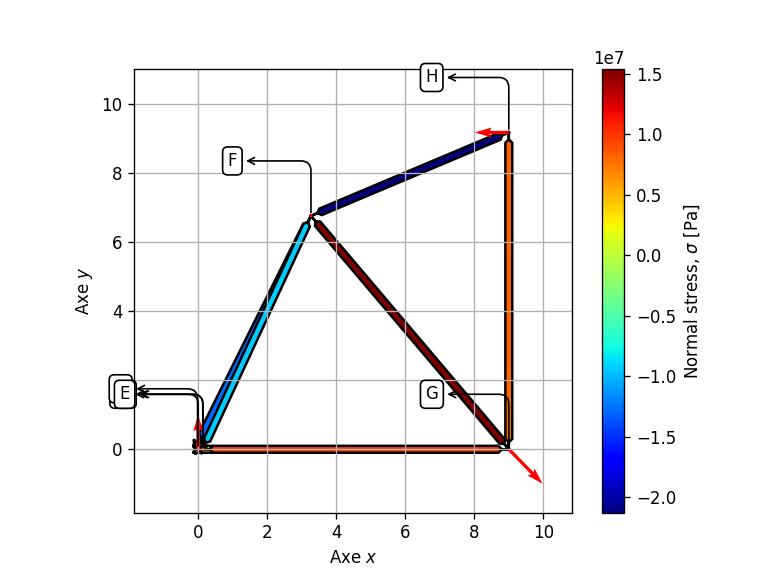

Text(0, 0.5, 'Axe $y$')

In [71]:

xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

**Question 4**: Same question with displacements also along $\vec x$ of $C$, $D$, $E$ and $F$. Is it better ?

In [53]:
model.data(at="nodes")

label coords                disp                    force             block  \
      o      x         y        ux        uy             Fx         Fy     bx   
0     A    0.0  0.000000 -0.000643  0.000000        0.00000  1000000.0  False   
1     C    3.0  0.000000 -0.000448 -0.001337        0.00000        0.0  False   
2     D    3.0  4.388507  0.000226 -0.001337        0.00000        0.0  False   
3     E    6.0  0.000000 -0.000253 -0.001882        0.00000        0.0  False   
4     F    6.0  6.788880  0.000283 -0.002071        0.00000        0.0  False   
5     G    9.0  0.000000  0.000000 -0.002688  1140838.95286 -1000000.0   True   
6     H    9.0  7.888931  0.000000 -0.002373 -1140838.95286        0.0   True   

          
      by  
0   True  
1  False  
2  False  
3  False  
4  False  
5  False  
6  False

In [68]:
def costfunction2(X):
    yf, yd, yh, xc, xd, xe, xf = X
    # update the model with new node coordinates
    model.nodes[4].coords[1] = yf
    model.nodes[2].coords[1] = yd
    model.nodes[6].coords[1] = yh
    
    
    model.nodes[1].coords[0] = xc
    model.nodes[2].coords[0] = xd
    model.nodes[3].coords[0] = xe
    model.nodes[4].coords[0] = xf
    
    
    
    #run the model
    model.solve()
    
    # get output data for fc computation 
    absUyg = np.abs(model.nodes[5].displacement[1]) 
    fc = model.mass() *  absUyg
    
    return fc

X0 = [1.,1.,1., 3, 3, 6, 6]  # Initial guess
sol = optimize.minimize(costfunction2, X0, method="nelder-mead")
X = sol.x
print("Solution: ", X)

Solution:  [ 6.66898038  0.24930626  9.0904284   0.14037097 -0.01331728  0.17810313
  3.37611677]


<IPython.core.display.Javascript object>


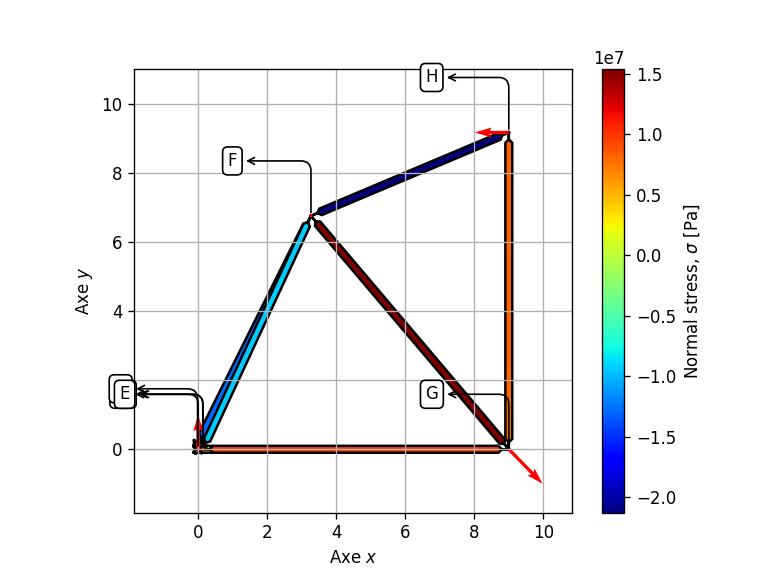

Text(0, 0.5, 'Axe $y$')

In [69]:
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

**Question 5**:  You can now try to perform topological optimization by removing/merging well chosen beams and nodes. In order to make the structure even more efficient.

**Question 6**: You are now asked to optimize the cross section along with the position of $C$, $D$, $E$ and $F$ in order to reach the yield stress in each individual beam.